# Delight SED

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- Creation date : February 28th 2021
- Update : October 23th 2021
- **CCIN2P3 : kernel anaconda3pbspzrail**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)
import scipy.stats
import sys
import os
sys.path.append('../')
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP

In [2]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [3]:
from pkg_resources import resource_filename

In [4]:
basedelight_datapath = resource_filename('delight', '../data')

In [5]:
basedelight_datapath = "../tmp/delight_indata"

# CWW SED

In [6]:
#ls ../data/BROWN_SEDs

In [7]:
files_sed_cww=["El_B2004a.dat","SB2_B2004a.dat","Sbc_B2004a.dat","ssp_25Myr_z008.dat","Im_B2004a.dat","SB3_B2004a.dat","Scd_B2004a.dat","ssp_5Myr_z008.dat"]

In [8]:
data_sed_cww= []
topdir = os.path.join(basedelight_datapath,"CWW_SEDs")

for file in files_sed_cww:
    fullfilename=os.path.join(topdir,file)
    data=np.loadtxt(fullfilename)
    data_sed_cww.append(data)

(0.01, 100.0)

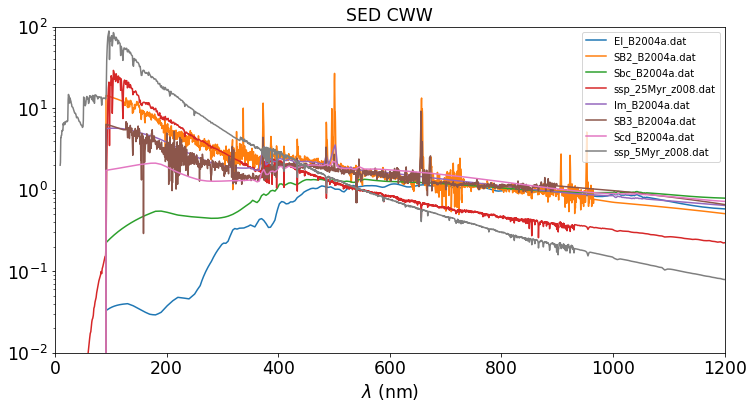

In [9]:
for idx in np.arange(len(data_sed_cww)):
    data=data_sed_cww[idx]
    x=data[:,0]/10
    y=data[:,1]
    plt.plot(x,y,"-",label=files_sed_cww[idx])
    
plt.legend()
plt.title("SED CWW")
plt.xlabel("$\lambda$ (nm)")
plt.xlim(0,1200)
plt.yscale("log")
plt.ylim(1e-2,1e2)

# Brown SED

In [10]:
from os import listdir
from os.path import isfile, join

In [11]:

topdir = os.path.join(basedelight_datapath,"BROWN_SEDs")

In [12]:
list_of_files=listdir(topdir)

In [13]:
list_of_files[:5]

['NGC_4450_spec.dat',
 'UGC_04881_spec.dat',
 'NGC_4569_spec.dat',
 'NGC_0855_spec.dat',
 'III_Zw_035_spec.dat']

In [14]:
files_sed_brown = [f for f in listdir(topdir) if isfile(join(topdir, f))]

In [15]:
files_sed_brown =sorted(files_sed_brown)

In [16]:
files_sed_brown.remove('names.txt')

In [17]:
data_sed_brown= []
topdir = os.path.join(basedelight_datapath,"BROWN_SEDs")

for file in files_sed_brown:
    fullfilename=os.path.join(topdir,file)
    data=np.loadtxt(fullfilename,comments='#')
    data_sed_brown.append(data)

(2e-16, 2e-12)

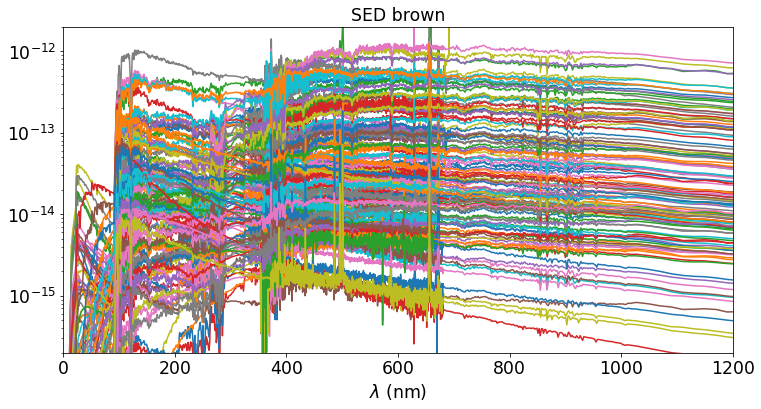

In [18]:
for idx in np.arange(len(data_sed_brown)):
    data=data_sed_brown[idx]
    x=data[:,0]/10
    y=data[:,1]
    plt.plot(x,y,"-",label=files_sed_brown[idx])
    
#plt.legend()
plt.title("SED brown")
plt.xlabel("$\lambda$ (nm)")
plt.xlim(0,1200)
plt.yscale("log")
plt.ylim(2e-16,2e-12)